# 5) Modeling

Table of Content here

## 5.1) Import necessary packages and load data

In [1]:
# Import packages
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import KFold, cross_val_score

In [4]:
from sklearn.metrics import precision_recall_fscore_support as score

In [5]:
from sklearn.metrics import roc_curve, roc_auc_score

In [6]:
from sklearn.model_selection import GridSearchCV

In [7]:
from sklearn.model_selection import RandomizedSearchCV

In [51]:
from bayes_opt import BayesianOptimization

In [8]:
from sklearn.ensemble import GradientBoostingClassifier

In [9]:
import time

In [10]:
from sklearn.metrics import precision_recall_curve

In [116]:
from sklearn.metrics import PrecisionRecallDisplay

In [11]:
from sklearn.metrics import precision_score, recall_score

In [21]:
from sklearn.linear_model import LogisticRegression

In [6]:
# Read in the latest dataset
drug_2 = pd.read_csv('../data/drug_2.csv', index_col=0)
print(drug_2.shape)
drug_2.head()

(1885, 43)


,age25-34,age35-44,age45-54,age55-64,age65+,Male,Edu_gr2,Edu_gr3,Edu_gr4,Edu_gr5,...,Education_level,Education,Country,Ethnicity,Age_level,Amyl_binary,Amyl_user,Cannabis_binary,Cannabis_user,Edu_gr
0,0,1,0,0,0,0,0,1,0,0,...,6,Professional certificate,UK,Mixed-White/Asian,3,Non-user,0,Non-user,0,Edu_gr3
1,1,0,0,0,0,1,0,0,0,1,...,9,Doctorate degree,UK,White,2,User,1,User,1,Edu_gr5
2,0,1,0,0,0,1,0,1,0,0,...,6,Professional certificate,UK,White,3,Non-user,0,User,1,Edu_gr3
3,0,0,0,0,0,0,0,0,0,1,...,8,Masters degree,UK,White,1,Non-user,0,User,1,Edu_gr5
4,0,1,0,0,0,0,0,0,0,1,...,9,Doctorate degree,UK,White,3,Non-user,0,User,1,Edu_gr5


## 5.2) Modeling Amyl consumption
There are two approaches to treat Age:
i) Consider Age as numerical type. That is to use 'Age_value' feature (Age_value has 6 levels).
ii) Consider Age as categorical type. That is to use dummies 'age25_34', 'age35_44' and so.
In section 5.2.1 we will do the first approach, and section 5.2.2 the second. 

### 5.2.1) Modeling with Age as numerical type

#### 5.2.1.1) Train and test split

In [7]:
col_list = ['Male', 'Edu_gr2', 'Edu_gr3', 'Edu_gr4', 'Edu_gr5', 'Canada', 'New Zealand', 'Other', 'Republic of Ireland', 
            'UK', 'USA', 'Age_value', 'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']
X = drug_2[col_list]
X.head()

,Male,Edu_gr2,Edu_gr3,Edu_gr4,Edu_gr5,Canada,New Zealand,Other,Republic of Ireland,UK,USA,Age_value,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS
0,0,0,1,0,0,0,0,0,0,1,0,0.49788,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084
1,1,0,0,0,1,0,0,0,0,1,0,-0.07854,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575
2,1,0,1,0,0,0,0,0,0,1,0,0.49788,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148
3,0,0,0,0,1,0,0,0,0,1,0,-0.95197,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084
4,0,0,0,0,1,0,0,0,0,1,0,0.49788,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575


In [8]:
y = drug_2['Amyl_user']
y.head()

0    0
1    1
2    0
3    0
4    0
Name: Amyl_user, dtype: int64

In [126]:
drug_2['Amyl_user'].value_counts(normalize=True)

0    0.803714
1    0.196286
Name: Amyl_user, dtype: float64

In [127]:
y_train.value_counts(normalize=True)

0    0.808355
1    0.191645
Name: Amyl_user, dtype: float64

In [128]:
y_test.value_counts(normalize=True)

0    0.785146
1    0.214854
Name: Amyl_user, dtype: float64

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=12)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# Next time we will do 'stratify', but for now this train-test-split is good (almost the same class proportion)

(1508, 19) (1508,)
(377, 19) (377,)


#### 5.2.1.2) Random Forest model

#### Explore Random Forest model

In [8]:
print(dir(RandomForestClassifier))
print(RandomForestClassifier())

['__abstractmethods__', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_check_feature_names', '_check_n_features', '_compute_oob_predictions', '_estimator_type', '_get_oob_predictions', '_get_param_names', '_get_tags', '_make_estimator', '_more_tags', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_required_parameters', '_set_oob_score_and_attributes', '_validate_X_predict', '_validate_data', '_validate_estimator', '_validate_y_class_weight', 'apply', 'decision_path', 'feature_importances_', 'fit', 'get_params', 'n_features_', 'predict', 'predict_log_proba', 'predict_proba', 'score',

In [9]:
rf = RandomForestClassifier(n_jobs=-1)
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

#### Explore RandomForestClassifier through Cross-Validation. Use only X_train and y_train.

In [11]:
# Explore RandomForestClassifier through Cross-Validation. Use only X_train and y_train
rf = RandomForestClassifier(n_jobs=-1)
k_fold = KFold(n_splits=5)
cross_val_score(rf, X_train, y_train, cv=k_fold, scoring='accuracy', n_jobs=-1)

array([0.80794702, 0.81788079, 0.81788079, 0.82724252, 0.80730897])

In [12]:
# Use roc_auc as performance measure
cross_val_score(rf, X_train, y_train, cv=k_fold, scoring='roc_auc', n_jobs=-1)

array([0.73397755, 0.74879032, 0.75740358, 0.74801587, 0.74390244])

#### Explore RandomForestClassifier through holdout set. Use both train and test sets.

In [15]:
# Fit model with default hyper-parameters
rf_fit = rf.fit(X_train, y_train)

In [16]:
# Output feature importance
sorted(zip(rf_fit.feature_importances_, X_train.columns), reverse=True)
# Yes, similar to what we have in EDA step

[(0.12242663450905042, 'Cscore'),
 (0.11514545930584628, 'Nscore'),
 (0.1144220742437734, 'Oscore'),
 (0.11066689941455875, 'Ascore'),
 (0.1090545563188401, 'Escore'),
 (0.09841159456701842, 'SS'),
 (0.07736107504946627, 'Impulsive'),
 (0.07102014698826864, 'Age_value'),
 (0.03347117805552255, 'Male'),
 (0.03151184892986846, 'USA'),
 (0.026174061488758178, 'UK'),
 (0.020252095605134343, 'Edu_gr4'),
 (0.019680128804221424, 'Edu_gr3'),
 (0.01797576039798906, 'Edu_gr5'),
 (0.009258103788733188, 'Other'),
 (0.009213690762690173, 'Edu_gr2'),
 (0.006269491838442038, 'Canada'),
 (0.0057204191070267365, 'Republic of Ireland'),
 (0.0019647808247915547, 'New Zealand')]

In [24]:
rf_fit.classes_

array([0, 1], dtype=int64)

In [21]:
# Predict on X_test
y_pred = rf_fit.predict(X_test)
y_pred_probs = rf_fit.predict_proba(X_test)
print(y_pred[:5])
print(y_pred_probs[:5])

[0 0 0 0 0]
[[0.83 0.17]
 [0.86 0.14]
 [0.78 0.22]
 [0.99 0.01]
 [0.76 0.24]]


In [28]:
# Output performance
precision, recall, fscore, support = score(y_test, y_pred, pos_label=1, average='binary')
print('Precision: {} / Recall: {} / Accuracy: {}'.format(round(precision, 3),
                                                        round(recall, 3),
                                                        round((y_pred==y_test).sum() / len(y_pred),3)))
# Performance is not greate, but consistent with rough version in EDA

Precision: 0.526 / Recall: 0.123 / Accuracy: 0.788


In [39]:
# Predict on X_train and output train performance
y_pred_train = rf_fit.predict(X_train)
precision_train, recall_train, fscore_train, support_train = score(y_train, y_pred_train, pos_label=1, average='binary')
print('Precision: {} / Recall: {} / Accuracy: {}'.format(round(precision_train, 3),
                                                        round(recall_train, 3),
                                                        round((y_pred_train==y_train).sum() / len(y_pred_train),3)))
# OK, this might be the evidence of overfitting. We have 'max_depth': None and 'min_samples_leaf': 1

Precision: 1.0 / Recall: 1.0 / Accuracy: 1.0


In [38]:
# Output roc_auc
print('roc_auc: {}'.format(round(roc_auc_score(y_test, y_pred_probs[:, 1]), 3)))

# Interesing roc_auc here is smaller than cross-validation

roc_auc: 0.683


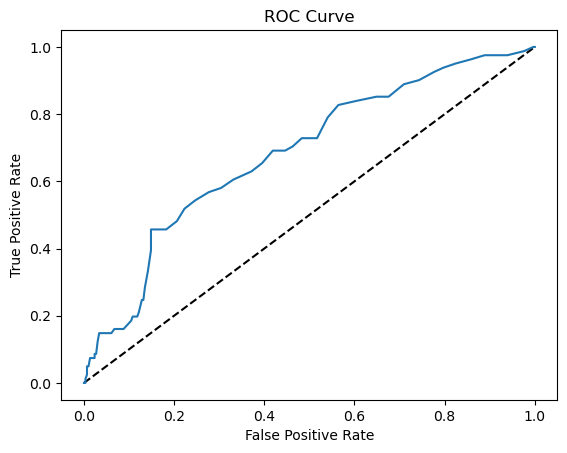

In [37]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs[:, 1])
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [43]:
# Try some not default hyperparameters
rf = RandomForestClassifier(n_estimators=50, max_depth=10, n_jobs=-1)
rf_fit = rf.fit(X_train, y_train)

# Test performance
y_pred = rf_fit.predict(X_test)
precision, recall, fscore, support = score(y_test, y_pred, pos_label=1, average='binary')
print('Precision: {} / Recall: {} / Accuracy: {}'.format(round(precision, 3),
                                                        round(recall, 3),
                                                        round((y_pred==y_test).sum() / len(y_pred),3)))

# Train performance
y_pred_train = rf_fit.predict(X_train)
precision_train, recall_train, fscore_train, support_train = score(y_train, y_pred_train, pos_label=1, average='binary')
print('Precision_train: {} / Recall_train: {} / Accuracy_train: {}'.format(round(precision_train, 3),
                                                        round(recall_train, 3),
                                                        round((y_pred_train==y_train).sum() / len(y_pred_train),3)))

# Now, train performance is worse, but test performance is worse as well 

Precision: 0.333 / Recall: 0.049 / Accuracy: 0.775
Precision_train: 1.0 / Recall_train: 0.654 / Accuracy_train: 0.934


#### Explore RandomForestClassifier with Grid-search (write your own grid search)
With holdout test set. Use both train and test sets.

In [44]:
# Function fit RF and output test performance (code from the Linkedin course)
def train_RF(n_est, depth):
    rf = RandomForestClassifier(n_estimators=n_est, max_depth=depth, n_jobs=-1)
    rf_fit = rf.fit(X_train, y_train)
    y_pred = rf_fit.predict(X_test)
    precision, recall, fscore, support = score(y_test, y_pred, pos_label=1, average='binary')
    print('Est: {} / Depth: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
        n_est, depth, round(precision, 3), round(recall, 3),
        round((y_pred==y_test).sum() / len(y_pred), 3)))

In [45]:
for n_est in [10, 50, 100, 150]:
    for depth in [10, 20, 30, None]:
        train_RF(n_est, depth)

Est: 10 / Depth: 10 ---- Precision: 0.368 / Recall: 0.086 / Accuracy: 0.772
Est: 10 / Depth: 20 ---- Precision: 0.389 / Recall: 0.086 / Accuracy: 0.775
Est: 10 / Depth: 30 ---- Precision: 0.5 / Recall: 0.16 / Accuracy: 0.785
Est: 10 / Depth: None ---- Precision: 0.36 / Recall: 0.111 / Accuracy: 0.767
Est: 50 / Depth: 10 ---- Precision: 0.529 / Recall: 0.111 / Accuracy: 0.788
Est: 50 / Depth: 20 ---- Precision: 0.5 / Recall: 0.136 / Accuracy: 0.785
Est: 50 / Depth: 30 ---- Precision: 0.478 / Recall: 0.136 / Accuracy: 0.782
Est: 50 / Depth: None ---- Precision: 0.474 / Recall: 0.111 / Accuracy: 0.782
Est: 100 / Depth: 10 ---- Precision: 0.438 / Recall: 0.086 / Accuracy: 0.78
Est: 100 / Depth: 20 ---- Precision: 0.5 / Recall: 0.123 / Accuracy: 0.785
Est: 100 / Depth: 30 ---- Precision: 0.429 / Recall: 0.111 / Accuracy: 0.777
Est: 100 / Depth: None ---- Precision: 0.5 / Recall: 0.173 / Accuracy: 0.785
Est: 150 / Depth: 10 ---- Precision: 0.375 / Recall: 0.074 / Accuracy: 0.775
Est: 150 / D

In [10]:
# Let use roc_auc performance measure
# Function fit RF and output test performance (code from the Linkedin course)
def train_RF(n_est, depth):
    rf = RandomForestClassifier(n_estimators=n_est, max_depth=depth, n_jobs=-1)
    rf_fit = rf.fit(X_train, y_train)
    y_pred_probs = rf_fit.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_pred_probs) 
    print('Est: {} / Depth: {} ---- roc_auc: {}'.format(
        n_est, depth, round(roc_auc, 3)))

In [11]:
for n_est in [10, 50, 100, 150]:
    for depth in [10, 20, 30, None]:
        train_RF(n_est, depth)
        
# n_est = 100, depth 30 is the best
# Interesting why still smaller than the numbers in cross-validation

Est: 10 / Depth: 10 ---- roc_auc: 0.693
Est: 10 / Depth: 20 ---- roc_auc: 0.661
Est: 10 / Depth: 30 ---- roc_auc: 0.616
Est: 10 / Depth: None ---- roc_auc: 0.69
Est: 50 / Depth: 10 ---- roc_auc: 0.688
Est: 50 / Depth: 20 ---- roc_auc: 0.686
Est: 50 / Depth: 30 ---- roc_auc: 0.678
Est: 50 / Depth: None ---- roc_auc: 0.69
Est: 100 / Depth: 10 ---- roc_auc: 0.694
Est: 100 / Depth: 20 ---- roc_auc: 0.697
Est: 100 / Depth: 30 ---- roc_auc: 0.713
Est: 100 / Depth: None ---- roc_auc: 0.696
Est: 150 / Depth: 10 ---- roc_auc: 0.701
Est: 150 / Depth: 20 ---- roc_auc: 0.69
Est: 150 / Depth: 30 ---- roc_auc: 0.693
Est: 150 / Depth: None ---- roc_auc: 0.705


#### Explore RandomForestClassifier with GridSearchCV. Use only train set.

In [15]:
# Test GridSearchCV with default hyperparameters
rf = RandomForestClassifier()
param = {'n_estimators': [100],
        'max_depth': [None]}

gs = GridSearchCV(rf, param, cv=5, n_jobs=-1)
gs_fit = gs.fit(X_train, y_train)
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

# Yes, the numbers are close to original cross-validation that I had above.

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.158404,0.00213,0.019747,0.003909,None,100,"{'max_depth': None, 'n_estimators': 100}",0.827815,0.824503,0.817881,0.813953,0.810631,0.818957,0.006399,1


In [16]:
# Test GridSearchCV if n_est = 100, depth 30 is the best
rf = RandomForestClassifier()
param = {'n_estimators': [100, 150],
        'max_depth': [30, None]}

gs = GridSearchCV(rf, param, cv=5, n_jobs=-1)
gs_fit = gs.fit(X_train, y_train)
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

# Very close performance. max_depth 30 is better than 'None'

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,0.446488,0.040041,0.051070,0.024453,30,150,"{'max_depth': 30, 'n_estimators': 150}",0.824503,0.824503,0.811258,0.807309,0.813953,0.816305,0.007019,1
0,0.323203,0.055206,0.023641,0.001711,30,100,"{'max_depth': 30, 'n_estimators': 100}",0.814570,0.831126,0.817881,0.817276,0.800664,0.816303,0.009703,2
2,0.337261,0.034783,0.044489,0.017436,None,100,"{'max_depth': None, 'n_estimators': 100}",0.824503,0.831126,0.811258,0.807309,0.807309,0.816301,0.009739,3
3,0.526986,0.054869,0.022740,0.007633,None,150,"{'max_depth': None, 'n_estimators': 150}",0.817881,0.821192,0.814570,0.794020,0.813953,0.812323,0.009511,4


In [17]:
# Test GridSearchCV if n_est = 100, depth 30 is the best in term of roc_auc
rf = RandomForestClassifier()
param = {'n_estimators': [100, 150],
        'max_depth': [30, None]}

gs = GridSearchCV(rf, param, scoring='roc_auc', cv=5, n_jobs=-1)
gs_fit = gs.fit(X_train, y_train)
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

# The best now is 150 and None. Interesting cross-validation is better than with holdout test set.

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,0.525581,0.018564,0.017555,0.000489,None,150,"{'max_depth': None, 'n_estimators': 150}",0.714528,0.742263,0.767312,0.756137,0.746153,0.745279,0.017657,1
2,0.380448,0.096840,0.021251,0.001688,None,100,"{'max_depth': None, 'n_estimators': 100}",0.700360,0.757808,0.758727,0.738931,0.743133,0.739792,0.021213,2
1,0.396610,0.006166,0.029528,0.000586,30,150,"{'max_depth': 30, 'n_estimators': 150}",0.723431,0.724774,0.752791,0.736732,0.724655,0.732477,0.011253,3
0,0.261139,0.001596,0.020149,0.000399,30,100,"{'max_depth': 30, 'n_estimators': 100}",0.709864,0.727530,0.765440,0.721087,0.728178,0.730420,0.018705,4


In [30]:
# Here if we use default performance metric
rf = RandomForestClassifier()
n_features = 19
param = {'max_features': ['auto', int(np.sqrt(n_features) + 3)]}

gs = GridSearchCV(rf, param, cv=5, n_jobs=-1)
gs_fit = gs.fit(X_train, y_train)
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.225943,0.057881,0.019149,0.006161,auto,{'max_features': 'auto'},0.814570,0.821192,0.811258,0.810631,0.813953,0.814321,0.003752,1
1,0.329879,0.007555,0.019357,0.001647,7,{'max_features': 7},0.807947,0.811258,0.827815,0.803987,0.810631,0.812328,0.008156,2


#### Hyperparameters search with GridSearchCV

In [34]:
n_features = 19 # Input the number of features here. Alternatively estimate a model and get _n_features_in_ attribute

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 9)]
criteria = ['gini', 'entropy', 'log_loss']
max_features = ['auto', int(np.sqrt(n_features)) + 2, int(np.sqrt(n_features)) + 4]
max_depth = [int(x) for x in np.linspace(10, 90, num = 5)]   
max_depth.append(None)
min_samples_split = [2, 6, 10]

print(n_estimators)
print(criteria)
print(max_features)
print(max_depth)
print(min_samples_split)

grid = {'n_estimators': n_estimators,
        'criterion': criteria,
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
        'max_features': max_features
        }
grid

[100, 150, 200, 250, 300, 350, 400, 450, 500]
['gini', 'entropy', 'log_loss']
['auto', 6, 8]
[10, 30, 50, 70, 90, None]
[2, 6, 10]


{'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500],
 'criterion': ['gini', 'entropy', 'log_loss'],
 'max_depth': [10, 30, 50, 70, 90, None],
 'min_samples_split': [2, 6, 10],
 'max_features': ['auto', 6, 8]}

In [36]:
# GridSearchCV here
rf = RandomForestClassifier()

gs = GridSearchCV(estimator = rf,
                  param_grid = grid,
                  cv=5,
                  n_jobs=-1,
                  scoring='roc_auc')
gs_fit = gs.fit(X_train, y_train)
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:10]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
2430 fits failed out of a total of 7290.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2430 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packa

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
507,0.686549,0.029421,0.046880,0.001516,entropy,10,auto,10,250,"{'criterion': 'entropy', 'max_depth': 10, 'max...",0.745124,0.766959,0.776993,0.758408,0.736195,0.756736,0.014659,1
534,0.775801,0.039541,0.047498,0.004090,entropy,10,6,10,250,"{'criterion': 'entropy', 'max_depth': 10, 'max...",0.740178,0.761023,0.786744,0.758408,0.728645,0.755000,0.019849,2
501,1.036223,0.007631,0.072124,0.000976,entropy,10,auto,6,400,"{'criterion': 'entropy', 'max_depth': 10, 'max...",0.743358,0.763002,0.778265,0.757485,0.730155,0.754453,0.016509,3
511,1.271461,0.086368,0.090373,0.020181,entropy,10,auto,10,450,"{'criterion': 'entropy', 'max_depth': 10, 'max...",0.739401,0.760953,0.778547,0.757273,0.734254,0.754085,0.015904,4
512,1.454498,0.121219,0.098252,0.010982,entropy,10,auto,10,500,"{'criterion': 'entropy', 'max_depth': 10, 'max...",0.739189,0.758267,0.779890,0.756918,0.734685,0.753790,0.016058,5
755,1.357724,0.016105,0.088578,0.000874,entropy,70,auto,10,500,"{'criterion': 'entropy', 'max_depth': 70, 'max...",0.746608,0.751767,0.775862,0.753086,0.737993,0.753063,0.012572,6
510,1.087629,0.059590,0.078000,0.011370,entropy,10,auto,10,400,"{'criterion': 'entropy', 'max_depth': 10, 'max...",0.742157,0.754734,0.776710,0.757273,0.733535,0.752882,0.014696,7
832,0.803497,0.001997,0.054062,0.001359,entropy,90,auto,10,300,"{'criterion': 'entropy', 'max_depth': 90, 'max...",0.734313,0.758197,0.773742,0.757202,0.739934,0.752678,0.014102,8
823,0.823357,0.010117,0.054655,0.001715,entropy,90,auto,6,300,"{'criterion': 'entropy', 'max_depth': 90, 'max...",0.747032,0.754522,0.772046,0.757769,0.729436,0.752161,0.013965,9
502,1.187261,0.008305,0.080201,0.002235,entropy,10,auto,6,450,"{'criterion': 'entropy', 'max_depth': 10, 'max...",0.739118,0.761518,0.775155,0.754576,0.729724,0.752018,0.016097,10


In [ ]:
#{'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500],: best 250, 400 
# 'criterion': ['gini', 'entropy', 'log_loss'],  :best is entropy
# 'max_depth': [10, 30, 50, 70, 90, None],: best 10
# 'min_samples_split': [2, 6, 10],: best 10, 6
# 'max_features': ['auto', 6, 8]}: best is auto, 6

In [38]:
gs_fit.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_split': 10,
 'n_estimators': 250}

For GridSearch we have 9x3x6x3x3 = 1458 combinations. With vc=5, we estimate 5x1458 = 7290 models. About 10 minutes.

#### Hyperparameters search with RandomizedSearchCV

In [41]:
# RandomizedSearchCV
# This random search the grid that we created before.
rf = RandomForestClassifier()

rs = RandomizedSearchCV(estimator = rf,
                  param_distributions = grid,
                  n_iter = 100,      
                  scoring='roc_auc',
                  n_jobs=-1,
                  cv=5)
rs_fit = rs.fit(X_train, y_train)
pd.DataFrame(rs_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:10]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
200 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
15,0.897755,0.016666,0.059056,0.001247,350,10,auto,90,entropy,"{'n_estimators': 350, 'min_samples_split': 10,...",0.744418,0.748445,0.769503,0.757485,0.741228,0.752216,0.010221,1
85,1.249607,0.022403,0.085183,0.001275,500,10,auto,10,entropy,"{'n_estimators': 500, 'min_samples_split': 10,...",0.731204,0.756713,0.777841,0.760749,0.733031,0.751908,0.017656,2
67,1.215304,0.110755,0.077801,0.004207,450,10,auto,10,entropy,"{'n_estimators': 450, 'min_samples_split': 10,...",0.735656,0.760882,0.771622,0.756066,0.724619,0.749769,0.017161,3
90,0.603863,0.021837,0.043786,0.001853,250,10,auto,50,gini,"{'n_estimators': 250, 'min_samples_split': 10,...",0.742581,0.745902,0.779890,0.740528,0.737058,0.749192,0.015615,4
63,1.733372,0.128985,0.101340,0.018523,500,2,6,90,entropy,"{'n_estimators': 500, 'min_samples_split': 2, ...",0.736645,0.754452,0.769679,0.749716,0.728322,0.747763,0.014356,5
55,0.900705,0.026123,0.059249,0.001154,350,10,auto,30,entropy,"{'n_estimators': 350, 'min_samples_split': 10,...",0.733324,0.751767,0.771410,0.751880,0.729077,0.747492,0.015162,6
23,0.259555,0.003085,0.019548,0.000797,100,10,auto,70,entropy,"{'n_estimators': 100, 'min_samples_split': 10,...",0.740107,0.753392,0.770774,0.753086,0.718579,0.747188,0.017310,7
3,0.480695,0.011060,0.040004,0.008198,200,6,auto,10,gini,"{'n_estimators': 200, 'min_samples_split': 6, ...",0.734737,0.734101,0.774802,0.740457,0.746117,0.746043,0.015025,8
36,1.097200,0.029070,0.087478,0.018686,400,10,auto,70,gini,"{'n_estimators': 400, 'min_samples_split': 10,...",0.743428,0.736433,0.772329,0.746346,0.729580,0.745623,0.014563,9
17,1.139459,0.016792,0.058850,0.001043,350,10,8,30,entropy,"{'n_estimators': 350, 'min_samples_split': 10,...",0.737422,0.750283,0.765757,0.750603,0.722102,0.745234,0.014640,10


- For RandomizedSearchCV, if the distribution is given as list then it will be sampled uniformly. Of course, the results should be worse than GridSearchCV (but we save time). This is OK if our grid has small steps.
- If distribution is given as distribution, we might able to find better performance than GridSearchCV, especially the grid steps are big (see the reading in Unit18).
- Let try to give distribution here.

In [45]:
n_estimators = list(range(100, 501, 1))
criteria = ['gini', 'entropy', 'log_loss']
max_features = ['auto', int(np.sqrt(n_features)) + 2, int(np.sqrt(n_features)) + 4]
max_depth = list(range(10, 91, 1)) + [None]  
min_samples_split = list(range(2, 11, 1))

print(n_estimators)
print(criteria)
print(max_features)
print(max_depth)
print(min_samples_split)

grid = {'n_estimators': n_estimators,
        'criterion': criteria,
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
        'max_features': max_features
        }
grid

[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299,

{'n_estimators': [100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  158,
  159,
  160,
  161,
  162,
  163,
  164,
  165,
  166,
  167,
  168,
  169,
  170,
  171,
  172,
  173,
  174,
  175,
  176,
  177,
  178,
  179,
  180,
  181,
  182,
  183,
  184,
  185,
  186,
  187,
  188,
  189,
  190,
  191,
  192,
  193,
  194,
  195,
  196,
  197,
  198,
  199,
  200,
  201,
  202,
  203,
  204,
  205,
  206,
  207,
  208,
  209,
  210,
  211,
  212,
  213,
  214,
  215,
  216,
  217,
  218,
  219,
  220,
  221,
  222,
  223,
  224,
  225,
  226,
  227,
  228,
  229,
  230,
  231,
  232,
  233,
  234,
  235,
  236,
  237,
  238,
  239,
  24

In [46]:
# RandomizedSearchCV with distribution of hyperparameters
rf = RandomForestClassifier()

rs = RandomizedSearchCV(estimator = rf,
                  param_distributions = grid,
                  n_iter = 100,      
                  scoring='roc_auc',
                  n_jobs=-1,
                  cv=5)
rs_fit = rs.fit(X_train, y_train)
pd.DataFrame(rs_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:10]

# The results are not better even thought here we give the algorithm more choices. 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
160 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
64,0.643169,0.083596,0.047879,0.009455,203,6,auto,41,entropy,"{'n_estimators': 203, 'min_samples_split': 6, ...",0.740743,0.758833,0.769997,0.749255,0.732169,0.750199,0.013281,1
32,1.324336,0.089802,0.082692,0.002238,487,9,auto,57,entropy,"{'n_estimators': 487, 'min_samples_split': 9, ...",0.727106,0.761588,0.768584,0.756705,0.725985,0.747994,0.017918,2
74,1.170138,0.138445,0.060644,0.002240,359,8,6,72,entropy,"{'n_estimators': 359, 'min_samples_split': 8, ...",0.735726,0.751555,0.773106,0.748687,0.728717,0.747558,0.015264,3
45,1.233260,0.123606,0.074709,0.006669,371,8,6,34,entropy,"{'n_estimators': 371, 'min_samples_split': 8, ...",0.732052,0.743499,0.768443,0.751384,0.742019,0.747479,0.012152,4
59,1.575093,0.104205,0.098354,0.039169,484,10,6,67,entropy,"{'n_estimators': 484, 'min_samples_split': 10,...",0.737210,0.751979,0.775791,0.742515,0.726416,0.746782,0.016692,5
19,0.972120,0.068803,0.056256,0.002028,319,9,6,46,entropy,"{'n_estimators': 319, 'min_samples_split': 9, ...",0.730709,0.746467,0.774166,0.749539,0.729652,0.746107,0.016168,6
46,1.079053,0.056185,0.061144,0.003321,350,7,6,88,entropy,"{'n_estimators': 350, 'min_samples_split': 7, ...",0.741238,0.745902,0.769715,0.748191,0.724547,0.745918,0.014492,7
53,1.154862,0.062361,0.072617,0.005999,411,7,auto,60,entropy,"{'n_estimators': 411, 'min_samples_split': 7, ...",0.724421,0.758055,0.768584,0.751667,0.726632,0.745872,0.017483,8
17,0.422526,0.046536,0.035905,0.009313,160,10,auto,16,gini,"{'n_estimators': 160, 'min_samples_split': 10,...",0.719262,0.745336,0.775933,0.737122,0.751294,0.745790,0.018536,9
33,0.791796,0.090166,0.053163,0.017160,231,6,6,44,entropy,"{'n_estimators': 231, 'min_samples_split': 6, ...",0.728166,0.752968,0.764980,0.744643,0.737561,0.745664,0.012644,10


#### Hyperparameters search with BayesianOptimization

In [ ]:
# BayesianOptimization optimize over a range, for example from 1 to 100.
# I don't know how to give it a categorical values, for example ['gini', 'entropy', 'log_loss']
# So in this section, for categorical hyperparameters we will use the best parameters from the results in GricSearchCV
# We will use BayesianOptimization to find optimal over the range of numerical parameters.
# The goal is to see if we can improve the performance over GridSearchCV with fewer iterations (i.e. save time)
# Of course, we can write a loop to do optimization over each of combinations of categorical parameters. 
# There are probably libraries that allow us to do so. 

# Here is the best hyperparameters from GridSearch. We will fix criterion and max_features, and try to find the best
# values for the remaining parameters using BayesianOptimization
# #{'criterion': 'entropy',
# 'max_depth': 10,
# 'max_features': 'auto',
# 'min_samples_split': 10,
# 'n_estimators': 250}

# with fixed criterion and max_feature, the GridSearch would have to try 9x6x3 = 162 times

In [58]:
# Define function to be optimized. This is roc_auc of cross-validation.
def rf_eval(max_depth, min_samples_split, n_estimators):
    rf = RandomForestClassifier(criterion = 'entropy',
                                max_features = 'auto',
                                n_jobs = -1,
                                max_depth = int(max_depth),
                                min_samples_split = int(min_samples_split),
                                n_estimators = int(n_estimators))
    k_fold = KFold(n_splits=5)
    return np.mean(cross_val_score(rf, X_train, y_train, cv=k_fold, scoring='roc_auc', n_jobs=-1))

In [59]:
# Check with the best model
rf_eval(10, 10, 250)

# performance is close, but not exactly the same.

0.7529637876447101

In [60]:
# Use BayesianOptimization to find the best hyperparameters
rfBO = BayesianOptimization(rf_eval, {'max_depth': (10, 90),
                                      'min_samples_split': (2, 10),
                                      'n_estimators': (100, 500)
                                     })

rfBO.maximize(n_iter=10, init_points=5)

|   iter    |  target   | max_depth | min_sa... | n_esti... |
-------------------------------------------------------------
| 1         | 0.7433    | 14.39     | 3.293     | 189.0     |
| 2         | 0.7472    | 33.65     | 4.075     | 444.5     |
| 3         | 0.7346    | 65.3      | 2.232     | 108.6     |
| 4         | 0.7464    | 19.53     | 5.756     | 402.4     |
| 5         | 0.7452    | 27.94     | 4.952     | 490.3     |
| 6         | 0.7481    | 38.02     | 6.852     | 441.2     |
| 7         | 0.7472    | 90.0      | 6.874     | 416.0     |
| 8         | 0.7498    | 89.67     | 9.026     | 480.9     |
| 9         | 0.7453    | 88.38     | 8.015     | 295.3     |
| 10        | 0.7514    | 10.0      | 2.0       | 299.8     |
| 11        | 0.752     | 10.0      | 10.0      | 260.8     |
| 12        | 0.7431    | 40.07     | 2.245     | 265.1     |
| 13        | 0.7471    | 11.86     | 7.273     | 332.2     |
| 14        | 0.7516    | 10.5      | 9.051     | 261.1     |
| 15    

In [ ]:
# This is our best parameters from GridSearchCV
# 'max_depth': 10,
# 'min_samples_split': 10,
# 'n_estimators': 250}

In [61]:
rfBO.maximize(n_iter=20, init_points=10)

|   iter    |  target   | max_depth | min_sa... | n_esti... |
-------------------------------------------------------------
| 16        | 0.7439    | 18.91     | 4.556     | 325.3     |
| 17        | 0.7451    | 69.58     | 6.854     | 397.6     |
| 18        | 0.744     | 78.62     | 5.168     | 316.8     |
| 19        | 0.7387    | 49.34     | 3.38      | 194.3     |
| 20        | 0.7448    | 14.36     | 2.65      | 106.7     |
| 21        | 0.7452    | 39.29     | 2.53      | 346.1     |
| 22        | 0.7463    | 22.07     | 2.78      | 351.7     |
| 23        | 0.741     | 24.48     | 5.241     | 235.1     |
| 24        | 0.7479    | 84.77     | 6.135     | 331.2     |
| 25        | 0.7502    | 45.04     | 5.387     | 268.1     |
| 26        | 0.7523    | 11.2      | 9.838     | 254.2     |
| 27        | 0.7505    | 52.57     | 8.717     | 269.4     |
| 28        | 0.7456    | 44.81     | 8.741     | 277.2     |
| 29        | 0.7486    | 10.07     | 2.746     | 250.7     |
| 30    

#### 5.2.1.3) Gradient Boosting model
We still need to find a good guidance on what hyperparameters are the most important in tuning Gradient Boosting.
This article https://medium.com/all-things-ai/in-depth-parameter-tuning-for-gradient-boosting-3363992e9bae describes the following parameters:

Boosting parameters:
learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01] - 0.1 was optimal for his dataset
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200] - 32 was optimal

Tree parameters:
max_depths = np.linspace(1, 32, 32, endpoint=True) - 4
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True) - 0.9
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True) - 0.3
max_features = list(range(1,train.shape[1]))

This article seems to be more comprehensive: https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/

#### Explore Gradient Boosting model

In [67]:
print(dir(GradientBoostingClassifier))

['_SUPPORTED_LOSS', '__abstractmethods__', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_check_feature_names', '_check_initialized', '_check_n_features', '_check_params', '_clear_state', '_compute_partial_dependence_recursion', '_estimator_type', '_fit_stage', '_fit_stages', '_get_param_names', '_get_tags', '_init_state', '_is_initialized', '_make_estimator', '_more_tags', '_raw_predict', '_raw_predict_init', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_required_parameters', '_resize_state', '_staged_raw_predict', '_validate_data', '_validate_estimator', '_validate_y', '_warn_ma

In [68]:
gb = GradientBoostingClassifier()
gb.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [69]:
# Explore GradientBoostingClassifier through Cross-Validation. Use only X_train and y_train
gb = GradientBoostingClassifier()
k_fold = KFold(n_splits=5)
cross_val_score(gb, X_train, y_train, cv=k_fold, scoring='roc_auc', n_jobs=-1)

# AUC seems to be smaller than RandomForest

array([0.72590822, 0.76108871, 0.76177686, 0.72930839, 0.68780488])

In [70]:
# Look at accuracy
cross_val_score(gb, X_train, y_train, cv=k_fold, scoring='accuracy', n_jobs=-1)

array([0.79470199, 0.79801325, 0.8013245 , 0.82724252, 0.81395349])

#### Hyperparameter search using GridSearchCV

In [77]:
n_features = 19 # Input the number of features here. Alternatively estimate a model and get _n_features_in_ attribute
max_features = ['auto', int(np.sqrt(n_features)) + 2, int(np.sqrt(n_features)) + 4]

grid = {
    'learning_rate': [0.05, 0.1, 0.15],
    'n_estimators': [50, 100, 150],
    'subsample': [0.8, 1],
    'max_depth': [3, 6, 9, 12, 15],
    'min_samples_split': [2, 6, 10],
    'max_features': max_features
    }
grid

{'learning_rate': [0.05, 0.1, 0.15],
 'n_estimators': [50, 100, 150],
 'subsample': [0.8, 1],
 'max_depth': [3, 6, 9, 12, 15],
 'min_samples_split': [2, 6, 10],
 'max_features': ['auto', 6, 8]}

In [78]:
# GridSearchCV here
start = time.time()
gb = GradientBoostingClassifier()

gs = GridSearchCV(estimator = gb,
                  param_grid = grid,
                  cv=5,
                  n_jobs=-1,
                  scoring='roc_auc')
gs_fit = gs.fit(X_train, y_train)
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:10]

end = time.time()
tune_time = (end - start)

In [79]:
tune_time

364.0726172924042

In [80]:
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:10]
# Best learning rate mostly 0.05 (8 out of top 10) => reduce further
# Best max_depth all 3 for top 10 
# Best max_features = auto 
# min_samples_split 6, 10, 2 (all possible values)
# n_estimators = 50 => let reduce this further
# subsample = 1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_max_features,param_min_samples_split,param_n_estimators,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
7,0.127488,0.022066,0.003789,0.000400,0.05,3,auto,6,50,1,"{'learning_rate': 0.05, 'max_depth': 3, 'max_f...",0.747845,0.775049,0.801583,0.757769,0.719478,0.760345,0.027385,1
13,0.115812,0.006984,0.003192,0.000399,0.05,3,auto,10,50,1,"{'learning_rate': 0.05, 'max_depth': 3, 'max_f...",0.745230,0.774484,0.802077,0.757521,0.719550,0.759773,0.027715,2
1,0.141952,0.026121,0.008784,0.010334,0.05,3,auto,2,50,1,"{'learning_rate': 0.05, 'max_depth': 3, 'max_f...",0.747809,0.775120,0.798686,0.757627,0.719478,0.759744,0.026537,3
270,0.129474,0.027234,0.003591,0.000798,0.1,3,auto,2,50,0.8,"{'learning_rate': 0.1, 'max_depth': 3, 'max_fe...",0.762578,0.762931,0.786532,0.747410,0.730515,0.757993,0.018585,4
3,0.229638,0.003972,0.003989,0.000631,0.05,3,auto,2,100,1,"{'learning_rate': 0.05, 'max_depth': 3, 'max_f...",0.748339,0.777381,0.792220,0.762771,0.705062,0.757155,0.029872,5
6,0.118511,0.018911,0.003590,0.000489,0.05,3,auto,6,50,0.8,"{'learning_rate': 0.05, 'max_depth': 3, 'max_f...",0.734737,0.767171,0.801053,0.757592,0.723217,0.756754,0.027133,6
0,0.132378,0.017219,0.004389,0.001017,0.05,3,auto,2,50,0.8,"{'learning_rate': 0.05, 'max_depth': 3, 'max_f...",0.758126,0.762542,0.780314,0.757911,0.724799,0.756738,0.017961,7
271,0.130375,0.026511,0.003293,0.000400,0.1,3,auto,2,50,1,"{'learning_rate': 0.1, 'max_depth': 3, 'max_fe...",0.744700,0.776957,0.793527,0.760998,0.705278,0.756292,0.030241,8
30,0.082692,0.011523,0.003391,0.000488,0.05,3,6,10,50,0.8,"{'learning_rate': 0.05, 'max_depth': 3, 'max_f...",0.752402,0.763355,0.788440,0.765361,0.710490,0.756010,0.025605,9
2,0.219161,0.007777,0.003991,0.000631,0.05,3,auto,2,100,0.8,"{'learning_rate': 0.05, 'max_depth': 3, 'max_f...",0.751696,0.778123,0.782434,0.749290,0.716782,0.755665,0.023619,10


In [81]:
# Try to reduce learning_rate and n_estimator

grid = {
    'learning_rate': [0.02, 0.035, 0.05],
    'n_estimators': [10, 30, 50],
    'subsample': [1],
    'max_depth': [3],
    'min_samples_split': [2, 6, 10],
    'max_features': ['auto']
    }
grid

{'learning_rate': [0.02, 0.035, 0.05],
 'n_estimators': [10, 30, 50],
 'subsample': [1],
 'max_depth': [3],
 'min_samples_split': [2, 6, 10],
 'max_features': ['auto']}

In [82]:
# GridSearchCV with reduced values for learning rate and n_estimators
start = time.time()
gb = GradientBoostingClassifier()

gs = GridSearchCV(estimator = gb,
                  param_grid = grid,
                  cv=5,
                  n_jobs=-1,
                  scoring='roc_auc')
gs_fit = gs.fit(X_train, y_train)

end = time.time()
tune_time = (end - start)
print(tune_time)
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:10]

# Interesting (lucky) the best parameters remain the same. learning_rate=0.05, n_estimators=50 seem to be the best.

4.830493688583374


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_max_features,param_min_samples_split,param_n_estimators,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
23,0.164391,0.049898,0.005186,2.985345e-03,0.05,3,auto,6,50,1,"{'learning_rate': 0.05, 'max_depth': 3, 'max_f...",0.750742,0.775049,0.801583,0.757627,0.719478,0.760896,0.027148,1
26,0.186234,0.024029,0.007780,3.590987e-03,0.05,3,auto,10,50,1,"{'learning_rate': 0.05, 'max_depth': 3, 'max_f...",0.749399,0.774484,0.802077,0.757521,0.719550,0.760606,0.027325,2
14,0.113124,0.002833,0.003790,7.462510e-04,0.035,3,auto,6,50,1,"{'learning_rate': 0.035, 'max_depth': 3, 'max_...",0.751166,0.773495,0.800099,0.756918,0.721024,0.760540,0.026059,3
17,0.113016,0.001716,0.003790,3.988033e-04,0.035,3,auto,10,50,1,"{'learning_rate': 0.035, 'max_depth': 3, 'max_...",0.750071,0.773566,0.800099,0.756492,0.721024,0.760250,0.026160,4
20,0.117114,0.007398,0.003192,3.993036e-04,0.05,3,auto,2,50,1,"{'learning_rate': 0.05, 'max_depth': 3, 'max_f...",0.747527,0.774837,0.798686,0.757379,0.719478,0.759581,0.026534,5
11,0.116608,0.004259,0.003989,5.436780e-07,0.035,3,auto,2,50,1,"{'learning_rate': 0.035, 'max_depth': 3, 'max_...",0.746008,0.773495,0.800028,0.756918,0.721240,0.759538,0.026423,6
19,0.068632,0.002123,0.003591,7.975221e-04,0.05,3,auto,2,30,1,"{'learning_rate': 0.05, 'max_depth': 3, 'max_f...",0.744877,0.775120,0.799145,0.752377,0.720700,0.758444,0.026759,7
22,0.069628,0.003672,0.003191,3.991130e-04,0.05,3,auto,6,30,1,"{'learning_rate': 0.05, 'max_depth': 3, 'max_f...",0.740284,0.775049,0.799145,0.752235,0.720700,0.757483,0.027279,8
25,0.092269,0.028474,0.007181,3.645332e-03,0.05,3,auto,10,30,1,"{'learning_rate': 0.05, 'max_depth': 3, 'max_f...",0.738341,0.775049,0.799145,0.751951,0.720700,0.757037,0.027544,9
2,0.120300,0.008045,0.003693,3.977902e-04,0.02,3,auto,2,50,1,"{'learning_rate': 0.02, 'max_depth': 3, 'max_f...",0.738977,0.776569,0.797131,0.752341,0.716171,0.756238,0.028299,10


In [83]:
gs_fit.best_params_

{'learning_rate': 0.05,
 'max_depth': 3,
 'max_features': 'auto',
 'min_samples_split': 6,
 'n_estimators': 50,
 'subsample': 1}

#### 5.2.1.4) Logistic regression model

### 5.2.2) Modeling with Age as categorical type

### 5.2.3) Optimal threshold and final model perfomance

#### 5.2.3.1 Choosing optimal threshold

The below was wrong. Need to redo splititng train set to 70-30 and determine the optimal threshold
The below was wrong. Need to redo splititng train set to 70-30 and determine the optimal threshold
The below was wrong. Need to redo splititng train set to 70-30 and determine the optimal threshold
The below was wrong. Need to redo splititng train set to 70-30 and determine the optimal threshold
The below was wrong. Need to redo splititng train set to 70-30 and determine the optimal threshold

In [84]:
gb = GradientBoostingClassifier(learning_rate=0.05, max_depth=3, max_features='auto', min_samples_split=6,
                                n_estimators=50, subsample=1)
gb_fit = gb.fit(X_train, y_train)

In [85]:
# Output feature importance
sorted(zip(gb_fit.feature_importances_, X_train.columns), reverse=True)
# Interesting, different from RF, for GB most important features are demographic 

[(0.22252023429168744, 'Age_value'),
 (0.15943717851155256, 'SS'),
 (0.1427625163850986, 'USA'),
 (0.10326515315859808, 'Male'),
 (0.08778675946957659, 'UK'),
 (0.08631467943869432, 'Cscore'),
 (0.0694381418695978, 'Oscore'),
 (0.04372869546569823, 'Ascore'),
 (0.023376029466515107, 'Nscore'),
 (0.01903346948549887, 'Impulsive'),
 (0.0178723383325867, 'Escore'),
 (0.015351466704207813, 'Republic of Ireland'),
 (0.004620986710157502, 'Edu_gr4'),
 (0.002993127406126623, 'Edu_gr2'),
 (0.0014992233044036991, 'New Zealand'),
 (0.0, 'Other'),
 (0.0, 'Edu_gr5'),
 (0.0, 'Edu_gr3'),
 (0.0, 'Canada')]

In [86]:
gb_fit.classes_

array([0, 1], dtype=int64)

In [87]:
# Predict on X_test
y_pred = gb_fit.predict(X_test)
y_pred_probs = gb_fit.predict_proba(X_test)
print(y_pred[:5])
print(y_pred_probs[:5])

[0 0 0 0 0]
[[0.85205945 0.14794055]
 [0.87298777 0.12701223]
 [0.62279203 0.37720797]
 [0.94623221 0.05376779]
 [0.83654968 0.16345032]]


In [88]:
# Output some TEST performance 
precision, recall, fscore, support = score(y_test, y_pred, pos_label=1, average='binary')
print('Precision: {} / Recall: {} / Accuracy: {}'.format(round(precision, 3),
                                                        round(recall, 3),
                                                        round((y_pred==y_test).sum() / len(y_pred),3)))
# Performance is bad in term of precision and recall.

Precision: 0.222 / Recall: 0.025 / Accuracy: 0.772


In [89]:
# Predict on X_train and output TRAIN performance
y_pred_train = gb_fit.predict(X_train)
precision_train, recall_train, fscore_train, support_train = score(y_train, y_pred_train, pos_label=1, average='binary')
print('Precision: {} / Recall: {} / Accuracy: {}'.format(round(precision_train, 3),
                                                        round(recall_train, 3),
                                                        round((y_pred_train==y_train).sum() / len(y_pred_train),3)))

# OK, still might be the evidence of overfitting after GridSearchCV

Precision: 0.767 / Recall: 0.114 / Accuracy: 0.824


In [90]:
# Output roc_auc
print('roc_auc: {}'.format(round(roc_auc_score(y_test, y_pred_probs[:, 1]), 3)))

# Interesing roc_auc here is smaller than cross-validation

roc_auc: 0.712


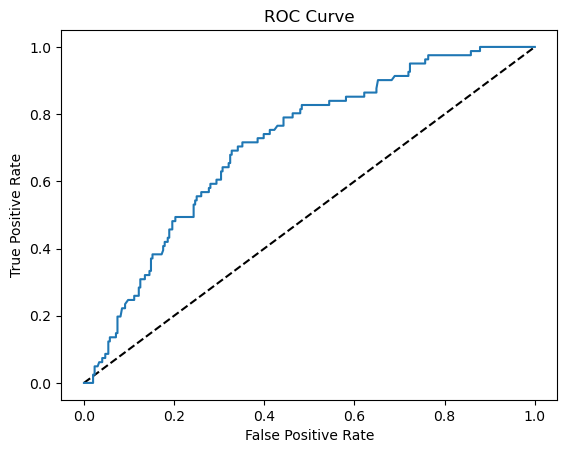

In [93]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs[:, 1])
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

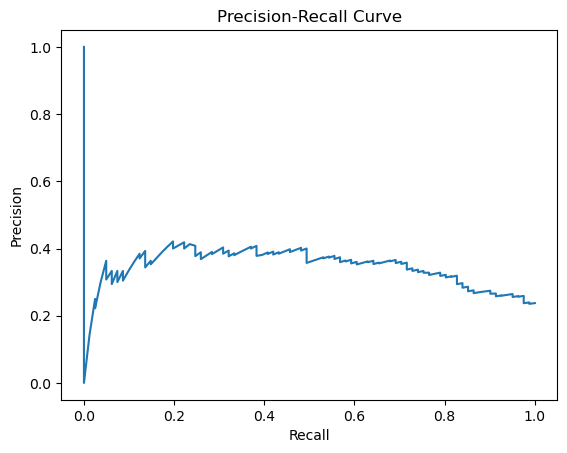

In [98]:
# Plot Precision-Recall (PC) curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_probs[:, 1])
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

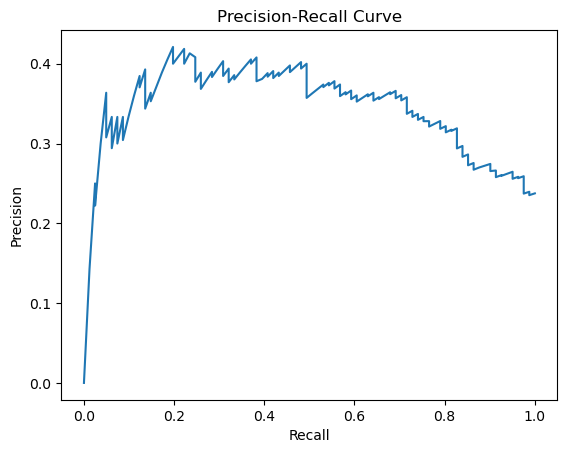

In [115]:
# Plot Precision-Recall (PC) curve without the last pair
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_probs[:, 1])
plt.plot(recall[:313], precision[:313])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

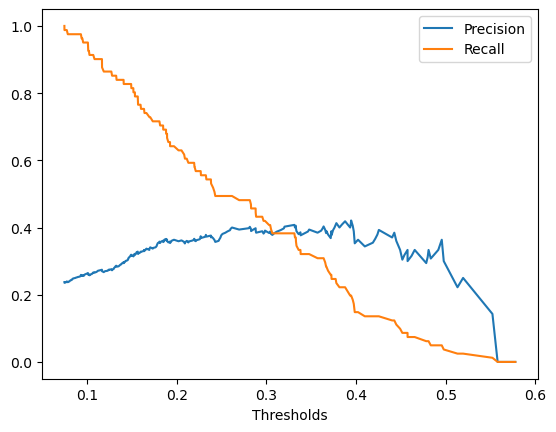

In [114]:
# Plot precision and recall as function of thresholds 
fig, ax = plt.subplots()
ax.plot(thresholds, precision[:313], label='Precision')
ax.plot(thresholds, recall[:313], label='Recall')
ax.set_xlabel('Thresholds')
ax.legend()

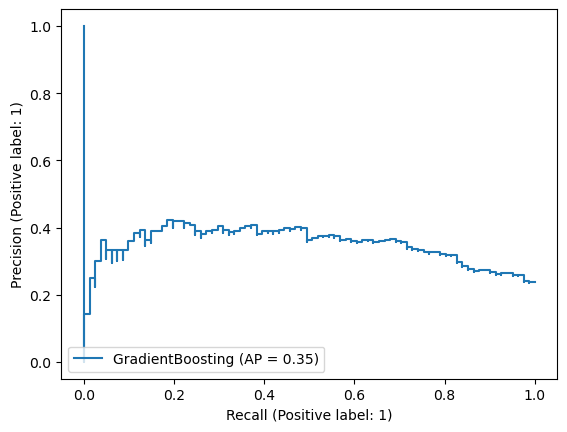

In [117]:
# Other way to draw Precision-Recall curve
display = PrecisionRecallDisplay.from_estimator(
    gb_fit, X_test, y_test, name="GradientBoosting"
)

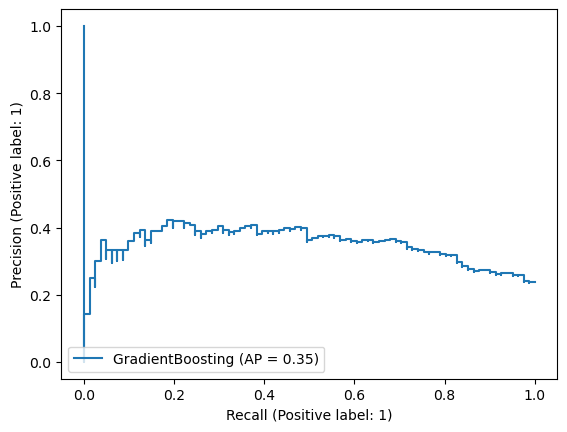

In [118]:
# Other way to draw Precision-Recall curve
display = PrecisionRecallDisplay.from_predictions(y_test, y_pred_probs[:, 1], name="GradientBoosting")

In [121]:
# Verify precision and recall at thresholds 0.5
print(precision_score(y_test, y_pred_probs[:, 1] > 0.5))
print(recall_score(y_test, y_pred_probs[:, 1] > 0.5))

0.2222222222222222
0.024691358024691357


In [123]:
drug_2['Amyl_user'].value_counts(normalize=True)

0    0.803714
1    0.196286
Name: Amyl_user, dtype: float64

In [124]:
y_train.value_counts(normalize=True)

0    0.808355
1    0.191645
Name: Amyl_user, dtype: float64

In [125]:
y_test.value_counts(normalize=True)

0    0.785146
1    0.214854
Name: Amyl_user, dtype: float64

## 5.3) Modeling Cannabis consumption

### 5.3.1) Modeling with Age as numerical type

### 5.3.1.1) Train and test split

In [15]:
# Read in the latest dataset
drug_2 = pd.read_csv('../data/drug_2.csv', index_col=0)
print(drug_2.shape)
drug_2.head()

(1885, 43)


,age25-34,age35-44,age45-54,age55-64,age65+,Male,Edu_gr2,Edu_gr3,Edu_gr4,Edu_gr5,...,Education_level,Education,Country,Ethnicity,Age_level,Amyl_binary,Amyl_user,Cannabis_binary,Cannabis_user,Edu_gr
0,0,1,0,0,0,0,0,1,0,0,...,6,Professional certificate,UK,Mixed-White/Asian,3,Non-user,0,Non-user,0,Edu_gr3
1,1,0,0,0,0,1,0,0,0,1,...,9,Doctorate degree,UK,White,2,User,1,User,1,Edu_gr5
2,0,1,0,0,0,1,0,1,0,0,...,6,Professional certificate,UK,White,3,Non-user,0,User,1,Edu_gr3
3,0,0,0,0,0,0,0,0,0,1,...,8,Masters degree,UK,White,1,Non-user,0,User,1,Edu_gr5
4,0,1,0,0,0,0,0,0,0,1,...,9,Doctorate degree,UK,White,3,Non-user,0,User,1,Edu_gr5


In [12]:
# Look at variables in memory. Variables have different types: type, ABCMeta, DataFrame, functions.
# use '%who function' to list all functions, '%who DataFrame' to list all DataFrame. 
%whos

Variable                     Type        Data/Info
--------------------------------------------------
GradientBoostingClassifier   ABCMeta     <class 'sklearn.ensemble.<...>dientBoostingClassifier'>
GridSearchCV                 ABCMeta     <class 'sklearn.model_sel<...>on._search.GridSearchCV'>
KFold                        ABCMeta     <class 'sklearn.model_selection._split.KFold'>
RandomForestClassifier       ABCMeta     <class 'sklearn.ensemble.<...>.RandomForestClassifier'>
RandomizedSearchCV           ABCMeta     <class 'sklearn.model_sel<...>arch.RandomizedSearchCV'>
cross_val_score              function    <function cross_val_score at 0x0000017D7036AAF0>
np                           module      <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
pd                           module      <module 'pandas' from 'C:<...>es\\pandas\\__init__.py'>
plt                          module      <module 'matplotlib.pyplo<...>\\matplotlib\\pyplot.py'>
precision_recall_curve       function    

In [134]:
%who function

cross_val_score	 precision_recall_curve	 precision_score	 recall_score	 rf_eval	 roc_auc_score	 roc_curve	 score	 train_RF	 
train_test_split	 


In [16]:
%who DataFrame

drug_2	 


In [14]:
%who Series

No variables match your requested type.


In [140]:
print(drug_2.shape)
drug_2.head()

(1885, 43)


,age25-34,age35-44,age45-54,age55-64,age65+,Male,Edu_gr2,Edu_gr3,Edu_gr4,Edu_gr5,...,Education_level,Education,Country,Ethnicity,Age_level,Amyl_binary,Amyl_user,Cannabis_binary,Cannabis_user,Edu_gr
0,0,1,0,0,0,0,0,1,0,0,...,6,Professional certificate,UK,Mixed-White/Asian,3,Non-user,0,Non-user,0,Edu_gr3
1,1,0,0,0,0,1,0,0,0,1,...,9,Doctorate degree,UK,White,2,User,1,User,1,Edu_gr5
2,0,1,0,0,0,1,0,1,0,0,...,6,Professional certificate,UK,White,3,Non-user,0,User,1,Edu_gr3
3,0,0,0,0,0,0,0,0,0,1,...,8,Masters degree,UK,White,1,Non-user,0,User,1,Edu_gr5
4,0,1,0,0,0,0,0,0,0,1,...,9,Doctorate degree,UK,White,3,Non-user,0,User,1,Edu_gr5


In [17]:
col_list = ['Male', 'Edu_gr2', 'Edu_gr3', 'Edu_gr4', 'Edu_gr5', 'Canada', 'New Zealand', 'Other', 'Republic of Ireland', 
            'UK', 'USA', 'Age_value', 'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']
X = drug_2[col_list]
X.head()

,Male,Edu_gr2,Edu_gr3,Edu_gr4,Edu_gr5,Canada,New Zealand,Other,Republic of Ireland,UK,USA,Age_value,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS
0,0,0,1,0,0,0,0,0,0,1,0,0.49788,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084
1,1,0,0,0,1,0,0,0,0,1,0,-0.07854,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575
2,1,0,1,0,0,0,0,0,0,1,0,0.49788,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148
3,0,0,0,0,1,0,0,0,0,1,0,-0.95197,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084
4,0,0,0,0,1,0,0,0,0,1,0,0.49788,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575


In [18]:
y = drug_2['Cannabis_user']
y.head()

0    0
1    1
2    1
3    1
4    1
Name: Cannabis_user, dtype: int64

In [19]:
# Split with stratify
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=12, stratify=y)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1508, 19) (1508,)
(377, 19) (377,)


In [20]:
# Check stratify
print('drug_2: ', drug_2['Cannabis_user'].value_counts(normalize=True))
print('y_train: ', y_train.value_counts(normalize=True))
print('y_test: ', y_test.value_counts(normalize=True))

drug_2:  1    0.671088
0    0.328912
Name: Cannabis_user, dtype: float64
y_train:  1    0.671088
0    0.328912
Name: Cannabis_user, dtype: float64
y_test:  1    0.671088
0    0.328912
Name: Cannabis_user, dtype: float64


#### 5.3.1.2) Random Forest model

#### Explore RandomForestClassifier through Cross-Validation

In [146]:
# Explore RandomForestClassifier through Cross-Validation. Use only X_train and y_train
rf = RandomForestClassifier(n_jobs=-1)
k_fold = KFold(n_splits=5)
cross_val_score(rf, X_train, y_train, cv=k_fold, scoring='accuracy', n_jobs=-1)

# Interesting not better than to predict Amyl_user

array([0.78476821, 0.81125828, 0.79801325, 0.79401993, 0.82059801])

In [147]:
# Assigning cv=5 to use StratifiedKFold
rf = RandomForestClassifier(n_jobs=-1)
cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

array([0.78807947, 0.8013245 , 0.79470199, 0.80066445, 0.80066445])

In [148]:
# Use roc_auc as performance measure
cross_val_score(rf, X_train, y_train, cv=5, scoring='roc_auc', n_jobs=-1)

# Interesting accuracy is not better, but auc is higher.

array([0.84846535, 0.87304075, 0.8629895 , 0.8880388 , 0.89081408])

#### Hyperparameter search using GridSearchCV

In [149]:
n_features = 19 # Input the number of features here. Alternatively estimate a model and get _n_features_in_ attribute

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 9)]
criteria = ['gini', 'entropy', 'log_loss']
max_features = ['auto', int(np.sqrt(n_features)) + 2, int(np.sqrt(n_features)) + 4]
max_depth = [int(x) for x in np.linspace(10, 90, num = 5)]   
max_depth.append(None)
min_samples_split = [2, 6, 10]

print(n_estimators)
print(criteria)
print(max_features)
print(max_depth)
print(min_samples_split)

grid = {'n_estimators': n_estimators,
        'criterion': criteria,
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
        'max_features': max_features
        }
grid

[100, 150, 200, 250, 300, 350, 400, 450, 500]
['gini', 'entropy', 'log_loss']
['auto', 6, 8]
[10, 30, 50, 70, 90, None]
[2, 6, 10]


{'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500],
 'criterion': ['gini', 'entropy', 'log_loss'],
 'max_depth': [10, 30, 50, 70, 90, None],
 'min_samples_split': [2, 6, 10],
 'max_features': ['auto', 6, 8]}

In [150]:
# GridSearchCV here
rf = RandomForestClassifier()

gs = GridSearchCV(estimator = rf,
                  param_grid = grid,
                  cv=5,
                  n_jobs=-1,
                  scoring='roc_auc')
gs_fit = gs.fit(X_train, y_train)
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:10]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
2430 fits failed out of a total of 7290.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2430 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packa

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
594,0.331073,0.021543,0.020753,0.001681,entropy,30,6,2,100,"{'criterion': 'entropy', 'max_depth': 30, 'max...",0.853639,0.886625,0.866323,0.894214,0.896615,0.879483,0.016749,1
496,0.420435,0.028385,0.028924,0.000630,entropy,10,auto,6,150,"{'criterion': 'entropy', 'max_depth': 10, 'max...",0.855545,0.883366,0.867542,0.896290,0.894489,0.879446,0.015738,2
25,1.150954,0.038788,0.081597,0.010871,gini,10,auto,10,450,"{'criterion': 'gini', 'max_depth': 10, 'max_fe...",0.851139,0.883017,0.870727,0.895940,0.895690,0.879302,0.016887,3
23,0.837827,0.024604,0.070030,0.009561,gini,10,auto,10,350,"{'criterion': 'gini', 'max_depth': 10, 'max_fe...",0.849851,0.883465,0.873414,0.894389,0.894489,0.879122,0.016598,4
10,0.388338,0.037565,0.031022,0.006449,gini,10,auto,6,150,"{'criterion': 'gini', 'max_depth': 10, 'max_fe...",0.850792,0.884560,0.868538,0.892989,0.898640,0.879104,0.017421,5
22,0.707242,0.014188,0.053066,0.001906,gini,10,auto,10,300,"{'criterion': 'gini', 'max_depth': 10, 'max_fe...",0.849257,0.881525,0.870279,0.896690,0.895490,0.878648,0.017614,6
186,1.059691,0.161811,0.080620,0.011200,gini,50,auto,10,400,"{'criterion': 'gini', 'max_depth': 50, 'max_fe...",0.847525,0.884510,0.870229,0.895540,0.894989,0.878559,0.018035,7
915,1.092514,0.050764,0.072918,0.001494,entropy,None,auto,10,400,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.853812,0.881674,0.866000,0.896790,0.894489,0.878553,0.016529,8
269,1.318828,0.137286,0.101848,0.019715,gini,70,auto,10,500,"{'criterion': 'gini', 'max_depth': 70, 'max_fe...",0.850396,0.882420,0.869632,0.894739,0.894689,0.878376,0.016790,9
104,0.844700,0.014482,0.060948,0.000575,gini,30,auto,10,350,"{'criterion': 'gini', 'max_depth': 30, 'max_fe...",0.851337,0.882669,0.870080,0.893739,0.893789,0.878323,0.016075,10


In [151]:
gs_fit.best_params_

{'criterion': 'entropy',
 'max_depth': 30,
 'max_features': 6,
 'min_samples_split': 2,
 'n_estimators': 100}

#### 5.3.1.3) Gradient Boosting model

#### Hyperparameter search using GridSearchCV

In [152]:
n_features = 19 # Input the number of features here. Alternatively estimate a model and get _n_features_in_ attribute
max_features = ['auto', int(np.sqrt(n_features)) + 2, int(np.sqrt(n_features)) + 4]

grid = {
    'learning_rate': [0.05, 0.1, 0.15],
    'n_estimators': [50, 100, 150],
    'subsample': [0.8, 1],
    'max_depth': [3, 6, 9, 12, 15],
    'min_samples_split': [2, 6, 10],
    'max_features': max_features
    }
grid

{'learning_rate': [0.05, 0.1, 0.15],
 'n_estimators': [50, 100, 150],
 'subsample': [0.8, 1],
 'max_depth': [3, 6, 9, 12, 15],
 'min_samples_split': [2, 6, 10],
 'max_features': ['auto', 6, 8]}

In [153]:
# GridSearchCV here
start = time.time()
gb = GradientBoostingClassifier()

gs = GridSearchCV(estimator = gb,
                  param_grid = grid,
                  cv=5,
                  n_jobs=-1,
                  scoring='roc_auc')
gs_fit = gs.fit(X_train, y_train)

print('Tune time: ', (time.time()-start))

pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:10]

Tune time:  335.24870467185974


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_max_features,param_min_samples_split,param_n_estimators,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
50,0.148521,0.004306,0.004588,7.979635e-04,0.05,3,8,10,100,0.8,"{'learning_rate': 0.05, 'max_depth': 3, 'max_f...",0.851733,0.875554,0.870777,0.898590,0.892639,0.877858,0.016651,1
18,0.067634,0.001158,0.003692,3.977555e-04,0.05,3,6,2,50,0.8,"{'learning_rate': 0.05, 'max_depth': 3, 'max_f...",0.849653,0.872319,0.871672,0.904215,0.887839,0.877140,0.018200,2
26,0.140547,0.003000,0.004092,2.042390e-04,0.05,3,6,6,100,0.8,"{'learning_rate': 0.05, 'max_depth': 3, 'max_f...",0.851485,0.876648,0.867542,0.899090,0.890589,0.877071,0.016812,3
38,0.150133,0.003126,0.005689,2.174076e-03,0.05,3,8,2,100,0.8,"{'learning_rate': 0.05, 'max_depth': 3, 'max_f...",0.852376,0.871225,0.868339,0.900940,0.892389,0.877054,0.017462,4
30,0.071020,0.001026,0.002993,2.653204e-06,0.05,3,6,10,50,0.8,"{'learning_rate': 0.05, 'max_depth': 3, 'max_f...",0.854109,0.870229,0.870503,0.900040,0.890289,0.877034,0.016245,5
558,0.068625,0.001532,0.003792,1.162918e-03,0.15,3,6,2,50,0.8,"{'learning_rate': 0.15, 'max_depth': 3, 'max_f...",0.849257,0.880032,0.869583,0.897240,0.888239,0.876870,0.016551,6
6,0.109227,0.006339,0.003591,4.889687e-04,0.05,3,auto,6,50,0.8,"{'learning_rate': 0.05, 'max_depth': 3, 'max_f...",0.850668,0.872120,0.865975,0.899340,0.896090,0.876839,0.018450,7
21,0.131367,0.003753,0.003989,4.156970e-07,0.05,3,6,2,100,1,"{'learning_rate': 0.05, 'max_depth': 3, 'max_f...",0.851733,0.875554,0.867194,0.898840,0.889589,0.876582,0.016561,8
8,0.206885,0.003919,0.003591,4.886750e-04,0.05,3,auto,6,100,0.8,"{'learning_rate': 0.05, 'max_depth': 3, 'max_f...",0.849950,0.873961,0.864059,0.898440,0.895740,0.876430,0.018534,9
582,0.077302,0.004127,0.003293,4.000264e-04,0.15,3,8,6,50,0.8,"{'learning_rate': 0.15, 'max_depth': 3, 'max_f...",0.848614,0.876001,0.867244,0.898690,0.891589,0.876428,0.017797,10


In [154]:
gs_fit.best_params_

{'learning_rate': 0.05,
 'max_depth': 3,
 'max_features': 8,
 'min_samples_split': 10,
 'n_estimators': 100,
 'subsample': 0.8}

In [155]:
# Try to reduce learning_rate and modify others 

grid = {
    'learning_rate': [0.02, 0.035, 0.05],
    'n_estimators': [50, 100],
    'subsample': [0.8, 1.0],
    'max_depth': [3],
    'min_samples_split': [2, 6, 10],
    'max_features': ['auto', 6, 8]
    }
grid

{'learning_rate': [0.02, 0.035, 0.05],
 'n_estimators': [50, 100],
 'subsample': [0.8, 1.0],
 'max_depth': [3],
 'min_samples_split': [2, 6, 10],
 'max_features': ['auto', 6, 8]}

In [156]:
# GridSearchCV here
start = time.time()
gb = GradientBoostingClassifier()

gs = GridSearchCV(estimator = gb,
                  param_grid = grid,
                  cv=5,
                  n_jobs=-1,
                  scoring='roc_auc')
gs_fit = gs.fit(X_train, y_train)

print('Tune time: ', (time.time()-start))

pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:10]

Tune time:  10.310890197753906


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_max_features,param_min_samples_split,param_n_estimators,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
19,0.137960,0.014494,0.004189,4.012587e-04,0.02,3,6,6,100,1.0,"{'learning_rate': 0.02, 'max_depth': 3, 'max_f...",0.850792,0.870279,0.870926,0.903490,0.894339,0.877965,0.018797,1
50,0.145442,0.006365,0.004092,4.856809e-04,0.035,3,6,2,100,0.8,"{'learning_rate': 0.035, 'max_depth': 3, 'max_...",0.849802,0.873712,0.872021,0.899040,0.894989,0.877913,0.017779,2
84,0.080701,0.008978,0.004589,1.620893e-03,0.05,3,6,2,50,0.8,"{'learning_rate': 0.05, 'max_depth': 3, 'max_f...",0.850545,0.874210,0.869234,0.901615,0.893039,0.877729,0.018047,3
22,0.155305,0.016658,0.003990,1.897788e-06,0.02,3,6,10,100,0.8,"{'learning_rate': 0.02, 'max_depth': 3, 'max_f...",0.851337,0.872518,0.870503,0.899890,0.894339,0.877717,0.017567,4
38,0.235312,0.013626,0.004493,8.888232e-04,0.035,3,auto,2,100,0.8,"{'learning_rate': 0.035, 'max_depth': 3, 'max_...",0.855396,0.874409,0.864408,0.898265,0.894039,0.877303,0.016578,5
66,0.151616,0.003254,0.003790,3.991610e-04,0.035,3,8,6,100,0.8,"{'learning_rate': 0.035, 'max_depth': 3, 'max_...",0.845644,0.874757,0.869160,0.900640,0.896290,0.877298,0.019901,6
93,0.065941,0.001353,0.003790,7.461110e-04,0.05,3,6,10,50,1.0,"{'learning_rate': 0.05, 'max_depth': 3, 'max_f...",0.846188,0.872767,0.869707,0.899590,0.897640,0.877178,0.019782,7
52,0.075907,0.003643,0.003990,6.309020e-04,0.035,3,6,6,50,0.8,"{'learning_rate': 0.035, 'max_depth': 3, 'max_...",0.850347,0.874708,0.867368,0.900240,0.892939,0.877120,0.017903,8
70,0.151426,0.003546,0.003989,4.422006e-07,0.035,3,8,10,100,0.8,"{'learning_rate': 0.035, 'max_depth': 3, 'max_...",0.852030,0.871921,0.866697,0.898040,0.895790,0.876895,0.017613,9
88,0.076117,0.004944,0.004787,2.221035e-03,0.05,3,6,6,50,0.8,"{'learning_rate': 0.05, 'max_depth': 3, 'max_f...",0.849356,0.870478,0.873762,0.900740,0.889789,0.876825,0.017574,10


In [157]:
gs_fit.best_params_

{'learning_rate': 0.02,
 'max_depth': 3,
 'max_features': 6,
 'min_samples_split': 6,
 'n_estimators': 100,
 'subsample': 1.0}

#### 5.3.1.4) Logistic regression model

#### Explore Logistic regression through Cross-Validation

In [22]:
# Estimate base model
logreg = LogisticRegression()
logreg_fit = logreg.fit(X_train, y_train)

y_pred = logreg_fit.predict(X_test)

print('Train accuracy', logreg_fit.score(X_train, y_train))
print('Test accuracy', logreg_fit.score(X_test, y_test))
print('Precison', precision_score(y_test, y_pred))
print('Recall', recall_score(y_test, y_pred))

# See very good performance

Train accuracy 0.8216180371352785
Test accuracy 0.8143236074270557
Precison 0.8505747126436781
Recall 0.8774703557312253


In [23]:
# Cross-validation with default hyperparemeters
logreg = LogisticRegression()
cross_val_score(logreg, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

array([0.7781457 , 0.79470199, 0.81456954, 0.82059801, 0.8538206 ])

In [24]:
# Use roc_auc as performance measure
cross_val_score(logreg, X_train, y_train, cv=5, scoring='roc_auc', n_jobs=-1)

array([0.85861386, 0.86405931, 0.87172215, 0.89708971, 0.89608961])

#### Hyperparameter search using GridSearchCV

In [25]:
solvers = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
penalties = ['l1', 'l2', 'elasticnet', None]
Cs = [0.001, 0.1, 1, 10, 100]

grid = {'solver': solvers,
        'penalty': penalties,
        'C': Cs    
        }
grid

{'solver': ['lbfgs',
  'liblinear',
  'newton-cg',
  'newton-cholesky',
  'sag',
  'saga'],
 'penalty': ['l1', 'l2', 'elasticnet', None],
 'C': [0.001, 0.1, 1, 10, 100]}

In [26]:
# GridSearchCV here
start = time.time()
logreg = LogisticRegression()

gs = GridSearchCV(estimator = logreg,
                  param_grid = grid,
                  cv=5,
                  n_jobs=-1,
                  scoring='roc_auc')
gs_fit = gs.fit(X_train, y_train)

print('Tune time: ', (time.time()-start))

pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:10]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
425 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Va

Tune time:  4.018561840057373


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
34,0.011570,0.000798,0.003693,0.000984,0.1,l2,sag,"{'C': 0.1, 'penalty': 'l2', 'solver': 'sag'}",0.856881,0.869732,0.871225,0.89579,0.89669,0.878063,0.015659,1
32,0.020052,0.003920,0.002992,0.000631,0.1,l2,newton-cg,"{'C': 0.1, 'penalty': 'l2', 'solver': 'newton-...",0.856931,0.869732,0.871225,0.89574,0.89669,0.878063,0.015634,2
35,0.015263,0.002434,0.004189,0.001466,0.1,l2,saga,"{'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}",0.856931,0.869732,0.871225,0.89574,0.89669,0.878063,0.015634,2
30,0.015063,0.002328,0.003392,0.000488,0.1,l2,lbfgs,"{'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}",0.856881,0.869732,0.871225,0.89574,0.89669,0.878053,0.015648,4
104,0.027334,0.006725,0.002593,0.000488,100,l2,newton-cg,"{'C': 100, 'penalty': 'l2', 'solver': 'newton-...",0.860792,0.862467,0.872419,0.89744,0.89704,0.878031,0.016180,5
102,0.061347,0.035190,0.008082,0.004310,100,l2,lbfgs,"{'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}",0.860792,0.862467,0.872369,0.89744,0.89704,0.878022,0.016183,6
106,0.069924,0.028470,0.007380,0.002863,100,l2,sag,"{'C': 100, 'penalty': 'l2', 'solver': 'sag'}",0.860743,0.862517,0.872170,0.89744,0.89719,0.878012,0.016234,7
80,0.029123,0.002308,0.003294,0.000400,10,l2,newton-cg,"{'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}",0.860545,0.862766,0.872369,0.89749,0.89679,0.877992,0.016133,8
82,0.047982,0.002515,0.004588,0.003192,10,l2,sag,"{'C': 10, 'penalty': 'l2', 'solver': 'sag'}",0.860545,0.862766,0.872369,0.89749,0.89679,0.877992,0.016133,8
78,0.045485,0.010890,0.002993,0.000892,10,l2,lbfgs,"{'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}",0.860545,0.862766,0.872369,0.89749,0.89679,0.877992,0.016133,8


In [27]:
gs_fit.best_params_

{'C': 0.1, 'penalty': 'l2', 'solver': 'sag'}

### 5.3.2) Modeling with Age as categorical type

#### 5.3.2.1) Train and test split

In [29]:
drug_2.columns

Index(['age25-34', 'age35-44', 'age45-54', 'age55-64', 'age65+', 'Male',
       'Edu_gr2', 'Edu_gr3', 'Edu_gr4', 'Edu_gr5', 'Canada', 'New Zealand',
       'Other', 'Republic of Ireland', 'UK', 'USA', 'ID', 'Age_value',
       'Gender_value', 'Education_value', 'Country_value', 'Ethnicity_value',
       'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS',
       'Amyl', 'Cannabis', 'Age', 'Gender', 'Education_level', 'Education',
       'Country', 'Ethnicity', 'Age_level', 'Amyl_binary', 'Amyl_user',
       'Cannabis_binary', 'Cannabis_user', 'Edu_gr'],
      dtype='object')

In [31]:
# Instead of taking 'Age_value' we will take 'age25-34', 'age35-44', 'age45-54', 'age55-64', 'age65+'
col_list = ['Male', 'Edu_gr2', 'Edu_gr3', 'Edu_gr4', 'Edu_gr5', 'Canada', 'New Zealand', 'Other', 'Republic of Ireland', 
            'UK', 'USA', 'age25-34', 'age35-44', 'age45-54', 'age55-64', 'age65+', 
            'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']
X = drug_2[col_list]
X.sample(10)

# Now we have 23 predictors instead of 19

,Male,Edu_gr2,Edu_gr3,Edu_gr4,Edu_gr5,Canada,New Zealand,Other,Republic of Ireland,UK,...,age45-54,age55-64,age65+,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS
1160,0,0,0,0,1,0,0,0,0,1,...,0,0,0,-0.14882,-0.94779,0.29338,0.94156,2.04506,-0.71126,-0.52593
605,1,0,0,1,0,0,0,0,0,1,...,0,0,0,-0.46725,0.00332,-1.11902,1.45039,-0.78155,-0.21712,1.22470
716,1,0,0,0,0,0,0,1,0,0,...,0,0,0,-0.05188,-1.23177,-0.71727,-0.60633,-0.27607,1.86203,1.22470
462,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0.31287,-0.80615,1.06238,0.76096,0.93949,0.19268,-0.21575
1499,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0.41667,-1.92173,0.88309,-0.15487,-0.52745,0.19268,-0.52593
847,1,0,0,0,1,0,0,0,0,0,...,0,1,0,-1.69163,0.00332,1.24033,1.28610,0.41594,0.19268,0.07987
38,1,0,0,1,0,0,0,0,0,1,...,1,0,0,-1.55078,1.28610,0.29338,-0.01729,0.75830,-0.21712,-0.84637
86,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0.73545,-0.15487,-1.11902,0.13136,-0.14277,-0.21712,0.40148
651,1,0,1,0,0,0,0,0,0,0,...,0,0,0,-0.67825,0.63779,-0.01928,0.13136,-0.00665,1.29221,0.40148
975,0,0,0,0,1,0,0,0,0,1,...,0,0,0,-0.58016,1.45421,-1.27553,1.61108,-0.40581,1.29221,1.22470


In [32]:
y = drug_2['Cannabis_user']
y.head()

0    0
1    1
2    1
3    1
4    1
Name: Cannabis_user, dtype: int64

In [33]:
# Split with stratify
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=12, stratify=y)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1508, 23) (1508,)
(377, 23) (377,)


In [34]:
# Check stratify
print('drug_2: ', drug_2['Cannabis_user'].value_counts(normalize=True))
print('y_train: ', y_train.value_counts(normalize=True))
print('y_test: ', y_test.value_counts(normalize=True))

drug_2:  1    0.671088
0    0.328912
Name: Cannabis_user, dtype: float64
y_train:  1    0.671088
0    0.328912
Name: Cannabis_user, dtype: float64
y_test:  1    0.671088
0    0.328912
Name: Cannabis_user, dtype: float64


#### 5.3.2.2) Random Forest model

In [35]:
# Now we have 23 features instead of 19
n_features = 23 # Input the number of features here. Alternatively estimate a model and get _n_features_in_ attribute

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 9)]
criteria = ['gini', 'entropy', 'log_loss']
max_features = ['auto', int(np.sqrt(n_features)) + 2, int(np.sqrt(n_features)) + 4]
max_depth = [int(x) for x in np.linspace(10, 90, num = 5)]   
max_depth.append(None)
min_samples_split = [2, 6, 10]

print(n_estimators)
print(criteria)
print(max_features)
print(max_depth)
print(min_samples_split)

grid = {'n_estimators': n_estimators,
        'criterion': criteria,
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
        'max_features': max_features
        }
grid

[100, 150, 200, 250, 300, 350, 400, 450, 500]
['gini', 'entropy', 'log_loss']
['auto', 6, 8]
[10, 30, 50, 70, 90, None]
[2, 6, 10]


{'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500],
 'criterion': ['gini', 'entropy', 'log_loss'],
 'max_depth': [10, 30, 50, 70, 90, None],
 'min_samples_split': [2, 6, 10],
 'max_features': ['auto', 6, 8]}

In [36]:
# GridSearchCV here
rf = RandomForestClassifier()

gs = GridSearchCV(estimator = rf,
                  param_grid = grid,
                  cv=5,
                  n_jobs=-1,
                  scoring='roc_auc')
gs_fit = gs.fit(X_train, y_train)
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:10]

# It seems this take a while now, just with some more dummy variables.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
2430 fits failed out of a total of 7290.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2430 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packa

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
508,0.843829,0.047464,0.055556,0.003208,entropy,10,auto,10,300,"{'criterion': 'entropy', 'max_depth': 10, 'max...",0.838663,0.882371,0.858287,0.883788,0.883488,0.869320,0.018121,1
18,0.232828,0.003536,0.019251,0.000747,gini,10,auto,10,100,"{'criterion': 'gini', 'max_depth': 10, 'max_fe...",0.839455,0.887197,0.856048,0.886639,0.876838,0.869235,0.018676,2
185,0.914437,0.083216,0.065434,0.009154,gini,50,auto,10,350,"{'criterion': 'gini', 'max_depth': 50, 'max_fe...",0.839406,0.881574,0.863164,0.885089,0.876338,0.869114,0.016617,3
21,0.645407,0.146137,0.046196,0.010121,gini,10,auto,10,250,"{'criterion': 'gini', 'max_depth': 10, 'max_fe...",0.841980,0.882918,0.861472,0.882638,0.876388,0.869079,0.015627,4
181,0.412094,0.073822,0.027925,0.001261,gini,50,auto,10,150,"{'criterion': 'gini', 'max_depth': 50, 'max_fe...",0.840644,0.883814,0.857491,0.878488,0.884638,0.869015,0.017266,5
90,0.291382,0.045248,0.024448,0.007051,gini,30,auto,6,100,"{'criterion': 'gini', 'max_depth': 30, 'max_fe...",0.838366,0.879733,0.865303,0.877788,0.883588,0.868956,0.016476,6
269,1.295632,0.087510,0.094164,0.009244,gini,70,auto,10,500,"{'criterion': 'gini', 'max_depth': 70, 'max_fe...",0.839307,0.884759,0.861223,0.879388,0.879888,0.868913,0.016834,7
22,0.807514,0.117881,0.053265,0.003829,gini,10,auto,10,300,"{'criterion': 'gini', 'max_depth': 10, 'max_fe...",0.837772,0.883515,0.858685,0.884388,0.879888,0.868850,0.018152,8
105,1.101385,0.106743,0.081502,0.017060,gini,30,auto,10,400,"{'criterion': 'gini', 'max_depth': 30, 'max_fe...",0.838861,0.880828,0.862616,0.881138,0.880788,0.868846,0.016584,9
346,0.832155,0.084140,0.070028,0.018889,gini,90,auto,10,300,"{'criterion': 'gini', 'max_depth': 90, 'max_fe...",0.835446,0.882122,0.864557,0.882738,0.878888,0.868750,0.017911,10


In [37]:
gs_fit.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_split': 10,
 'n_estimators': 300}

#### 5.3.2.3) Gradient Boosting model

In [38]:
# Now we have 23 features instead of 19
n_features = 23 # Input the number of features here. Alternatively estimate a model and get _n_features_in_ attribute
max_features = ['auto', int(np.sqrt(n_features)) + 2, int(np.sqrt(n_features)) + 4]

grid = {
    'learning_rate': [0.05, 0.1, 0.15],
    'n_estimators': [50, 100, 150],
    'subsample': [0.8, 1],
    'max_depth': [3, 6, 9, 12, 15],
    'min_samples_split': [2, 6, 10],
    'max_features': max_features
    }
grid

{'learning_rate': [0.05, 0.1, 0.15],
 'n_estimators': [50, 100, 150],
 'subsample': [0.8, 1],
 'max_depth': [3, 6, 9, 12, 15],
 'min_samples_split': [2, 6, 10],
 'max_features': ['auto', 6, 8]}

In [39]:
# GridSearchCV here
start = time.time()
gb = GradientBoostingClassifier()

gs = GridSearchCV(estimator = gb,
                  param_grid = grid,
                  cv=5,
                  n_jobs=-1,
                  scoring='roc_auc')
gs_fit = gs.fit(X_train, y_train)

print('Tune time: ', (time.time()-start))

pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:10]

Tune time:  340.18131828308105


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_max_features,param_min_samples_split,param_n_estimators,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
570,0.069725,0.003043,0.004189,0.000398,0.15,3,6,10,50,0.8,"{'learning_rate': 0.15, 'max_depth': 3, 'max_f...",0.842327,0.875554,0.866597,0.890089,0.894489,0.873811,0.018649,1
38,0.170393,0.021737,0.003990,0.000892,0.05,3,8,2,100,0.8,"{'learning_rate': 0.05, 'max_depth': 3, 'max_f...",0.848663,0.876648,0.869060,0.890889,0.882488,0.873550,0.014350,2
295,0.081106,0.015224,0.003590,0.000798,0.1,3,6,6,50,1,"{'learning_rate': 0.1, 'max_depth': 3, 'max_fe...",0.841832,0.876798,0.862467,0.895040,0.883588,0.871945,0.018380,3
47,0.229138,0.058788,0.004190,0.000398,0.05,3,8,6,150,1,"{'learning_rate': 0.05, 'max_depth': 3, 'max_f...",0.844901,0.874011,0.864059,0.891389,0.884388,0.871750,0.016313,4
35,0.205604,0.046656,0.004388,0.000488,0.05,3,6,10,150,1,"{'learning_rate': 0.05, 'max_depth': 3, 'max_f...",0.842525,0.875355,0.860327,0.893189,0.886889,0.871657,0.018365,5
20,0.148329,0.022601,0.004188,0.000399,0.05,3,6,2,100,0.8,"{'learning_rate': 0.05, 'max_depth': 3, 'max_f...",0.841832,0.877395,0.862865,0.893089,0.882838,0.871604,0.017800,6
44,0.162003,0.028950,0.005187,0.002393,0.05,3,8,6,100,0.8,"{'learning_rate': 0.05, 'max_depth': 3, 'max_f...",0.843960,0.883465,0.858884,0.889589,0.882038,0.871587,0.017315,7
32,0.156711,0.044368,0.003790,0.000398,0.05,3,6,10,100,0.8,"{'learning_rate': 0.05, 'max_depth': 3, 'max_f...",0.843168,0.876101,0.858685,0.891739,0.887089,0.871356,0.018114,8
28,0.240115,0.045160,0.004492,0.000447,0.05,3,6,6,150,0.8,"{'learning_rate': 0.05, 'max_depth': 3, 'max_f...",0.844208,0.871623,0.864706,0.894989,0.881138,0.871333,0.016944,9
27,0.131973,0.022670,0.004092,0.000207,0.05,3,6,6,100,1,"{'learning_rate': 0.05, 'max_depth': 3, 'max_f...",0.839703,0.875404,0.864433,0.890739,0.884813,0.871018,0.018014,10


In [40]:
gs_fit.best_params_

{'learning_rate': 0.15,
 'max_depth': 3,
 'max_features': 6,
 'min_samples_split': 10,
 'n_estimators': 50,
 'subsample': 0.8}

#### 5.3.2.4) Logistic regression model

In [41]:
solvers = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
penalties = ['l1', 'l2', 'elasticnet', None]
Cs = [0.001, 0.1, 1, 10, 100]

grid = {'solver': solvers,
        'penalty': penalties,
        'C': Cs    
        }
grid

{'solver': ['lbfgs',
  'liblinear',
  'newton-cg',
  'newton-cholesky',
  'sag',
  'saga'],
 'penalty': ['l1', 'l2', 'elasticnet', None],
 'C': [0.001, 0.1, 1, 10, 100]}

In [42]:
# GridSearchCV here
start = time.time()
logreg = LogisticRegression()

gs = GridSearchCV(estimator = logreg,
                  param_grid = grid,
                  cv=5,
                  n_jobs=-1,
                  scoring='roc_auc')
gs_fit = gs.fit(X_train, y_train)

print('Tune time: ', (time.time()-start))

pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:10]

Tune time:  4.190598487854004


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
425 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Va

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
80,0.026928,0.003153,0.002496,4.457074e-04,10,l2,newton-cg,"{'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}",0.860941,0.863462,0.870826,0.89954,0.895140,0.877982,0.016196,1
78,0.028427,0.007026,0.002394,7.979989e-04,10,l2,lbfgs,"{'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}",0.860941,0.863462,0.870826,0.89954,0.895140,0.877982,0.016196,1
82,0.071518,0.029514,0.005187,3.240473e-03,10,l2,sag,"{'C': 10, 'penalty': 'l2', 'solver': 'sag'}",0.860990,0.863462,0.870826,0.89949,0.895140,0.877982,0.016172,3
83,0.035710,0.005958,0.001995,1.507891e-07,10,l2,saga,"{'C': 10, 'penalty': 'l2', 'solver': 'saga'}",0.860842,0.863412,0.870976,0.89949,0.895040,0.877952,0.016178,4
79,0.007979,0.002092,0.003989,2.522703e-03,10,l2,liblinear,"{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}",0.860396,0.863711,0.870578,0.90004,0.894539,0.877853,0.016300,5
106,0.029224,0.001073,0.001995,6.305248e-04,100,l2,sag,"{'C': 100, 'penalty': 'l2', 'solver': 'sag'}",0.859554,0.862666,0.871822,0.89934,0.895640,0.877804,0.016613,6
103,0.005385,0.000489,0.001795,3.989220e-04,100,l2,liblinear,"{'C': 100, 'penalty': 'l2', 'solver': 'libline...",0.858960,0.862815,0.872021,0.89944,0.895640,0.877775,0.016730,7
107,0.069022,0.039454,0.005489,4.086242e-03,100,l2,saga,"{'C': 100, 'penalty': 'l2', 'solver': 'saga'}",0.860198,0.862815,0.871225,0.89939,0.895240,0.877773,0.016419,8
101,0.084489,0.052379,0.003791,3.591084e-03,100,l1,saga,"{'C': 100, 'penalty': 'l1', 'solver': 'saga'}",0.860149,0.862815,0.871175,0.89944,0.895240,0.877764,0.016446,9
77,0.094759,0.040709,0.004291,3.882661e-03,10,l1,saga,"{'C': 10, 'penalty': 'l1', 'solver': 'saga'}",0.859950,0.863064,0.871424,0.89954,0.894839,0.877764,0.016367,10


In [43]:
gs_fit.best_params_

{'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}

### 5.3.3) Optimal threshold and final model performance

#### 5.3.3.1) Choosing optimal threshold

#### 5.3.3.2) Evaluate performance on test set